# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import scipy.stats as stat
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import *

In [86]:
data=pd.read_csv("iris.csv").sample(frac=1)

In [87]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor


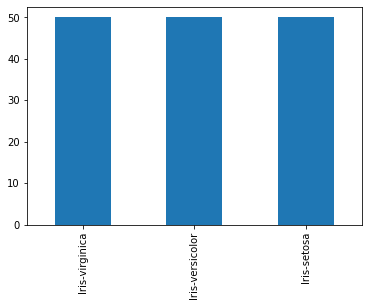

In [88]:
data["Species"].value_counts().plot.bar()

In [89]:
X=data.iloc[:,1:-1]
y=pd.get_dummies(data["Species"])

# Q-Q plot

In [90]:
def plot_data(df,feature):
    print("Skewness of "+feature+" is",df[feature].skew())
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    pl.suptitle(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pl)
    plt.show()

Skewness of SepalLengthCm is 0.3149109566369727


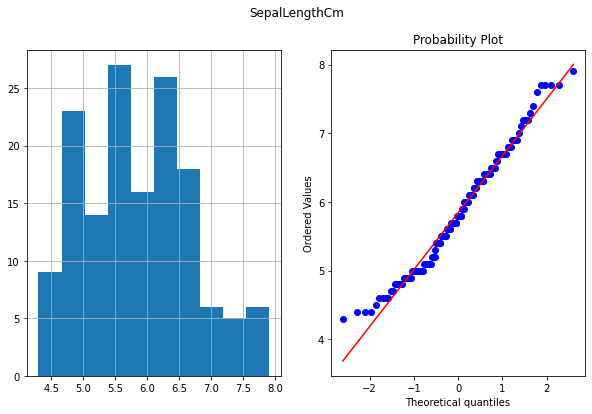

Skewness of SepalWidthCm is 0.33405266217208657


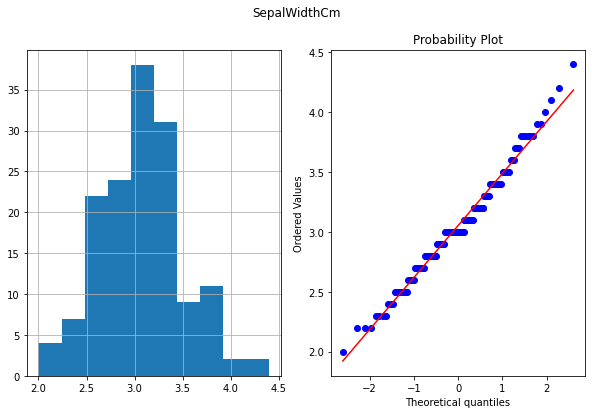

Skewness of PetalLengthCm is -0.2744642524737827


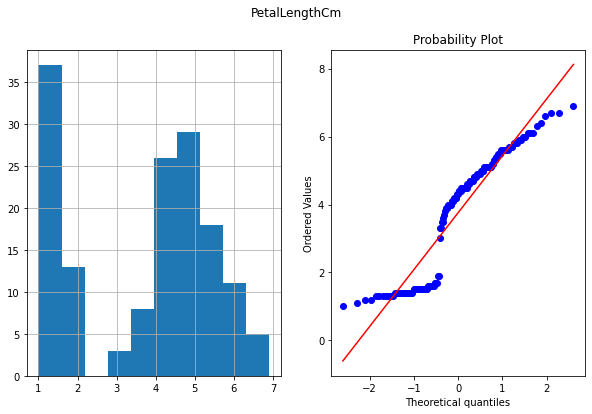

Skewness of PetalWidthCm is -0.10499656214412727


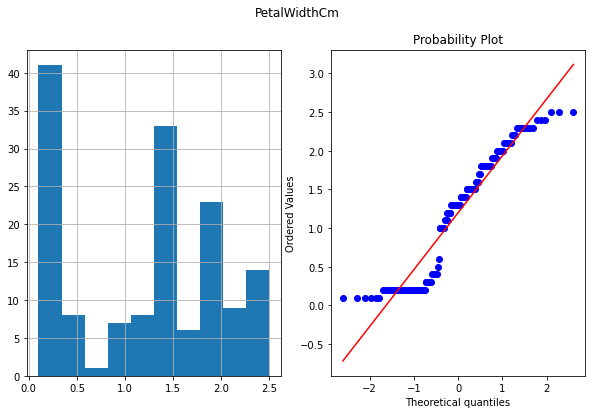

In [127]:
for column in X.columns:
    plot_data(X,column)

# Spliting the train and test

In [92]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=41)

In [93]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [94]:
from tensorflow.keras import regularizers

# model developing

In [95]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0008,beta_1=0.95)

In [107]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [108]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [109]:
history=model.fit(X_train,y_train,epochs=200,batch_size=5,validation_data=(X_test,y_test))

Epoch 1/200
21/21 [==============================] - 1s 30ms/step - loss: 1.1014 - accuracy: 0.3714 - val_loss: 0.9716 - val_accuracy: 0.6000
Epoch 2/200
21/21 [==============================] - 0s 6ms/step - loss: 0.8671 - accuracy: 0.7524 - val_loss: 0.7611 - val_accuracy: 0.7111
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6372 - accuracy: 0.7905 - val_loss: 0.5589 - val_accuracy: 0.7556
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4605 - accuracy: 0.8095 - val_loss: 0.4748 - val_accuracy: 0.7556
Epoch 5/200
21/21 [==============================] - 0s 6ms/step - loss: 0.3819 - accuracy: 0.8381 - val_loss: 0.4408 - val_accuracy: 0.7333
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8571 - val_loss: 0.4175 - val_accuracy: 0.7333
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8571 - val_loss: 0.3916 - val_accuracy: 0.7556
Epoch 8/200


21/21 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9810 - val_loss: 0.0505 - val_accuracy: 0.9778
Epoch 59/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0480 - accuracy: 0.9810 - val_loss: 0.0496 - val_accuracy: 0.9778
Epoch 60/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9810 - val_loss: 0.0507 - val_accuracy: 0.9778
Epoch 61/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0473 - accuracy: 0.9810 - val_loss: 0.0520 - val_accuracy: 0.9778
Epoch 62/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0469 - accuracy: 0.9810 - val_loss: 0.0521 - val_accuracy: 0.9778
Epoch 63/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0469 - accuracy: 0.9810 - val_loss: 0.0531 - val_accuracy: 0.9778
Epoch 64/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0481 - accuracy: 0.9810 - val_loss: 0.0480 - val_accuracy: 0.9778
Epoch 65/200
21/21 

21/21 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.9905 - val_loss: 0.0596 - val_accuracy: 0.9778
Epoch 116/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.9905 - val_loss: 0.0490 - val_accuracy: 0.9778
Epoch 117/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.9905 - val_loss: 0.0621 - val_accuracy: 0.9778
Epoch 118/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.9905 - val_loss: 0.0616 - val_accuracy: 0.9778
Epoch 119/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0582 - val_accuracy: 0.9778
Epoch 120/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0533 - val_accuracy: 0.9778
Epoch 121/200
21/21 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.9905 - val_loss: 0.0555 - val_accuracy: 0.9778
Epoch 122/200

21/21 [==============================] - 0s 8ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0634 - val_accuracy: 0.9778
Epoch 173/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9778
Epoch 174/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9778
Epoch 175/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0202 - accuracy: 0.9905 - val_loss: 0.0671 - val_accuracy: 0.9778
Epoch 176/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9778
Epoch 177/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9778
Epoch 178/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0695 - val_accuracy: 0.9778
Epoch 179/200

# ploting loss and accuracy for every epochs

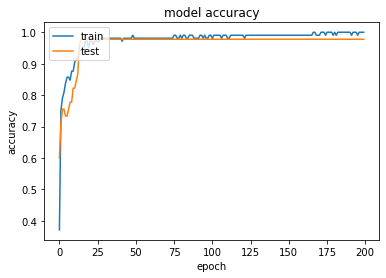

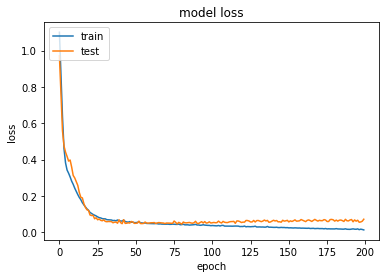

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Perfomence metrics

In [111]:
y_pred=model.predict(X_test)

In [112]:
y_pred = (y_pred > 0.5)

## Test accuracy

In [113]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [117]:
confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]], dtype=int64)

## Test f1 score 

In [120]:
f1_score(y_test, y_pred, pos_label='positive',average='micro')

C:\Users\Ramu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.9777777777777777

In [121]:
y_pred=model.predict(X_train)

In [122]:
y_pred = (y_pred > 0.5)

## Train accuracy

In [124]:
accuracy_score(y_train,y_pred)

1.0

In [125]:
confusion_matrix(
    y_train.values.argmax(axis=1), y_pred.argmax(axis=1))

array([[35,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 36]], dtype=int64)

## Train f1 score 

In [126]:
f1_score(y_train, y_pred, pos_label='positive',average='micro')

C:\Users\Ramu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


1.0